## House Price Prediction

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('housing_price_dataset.csv')
df.head(5)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


### Data Cleaning

In [3]:
df.shape

(50000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [6]:
df.dropna()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


### Visualization

<Axes: xlabel='SquareFeet', ylabel='Price'>

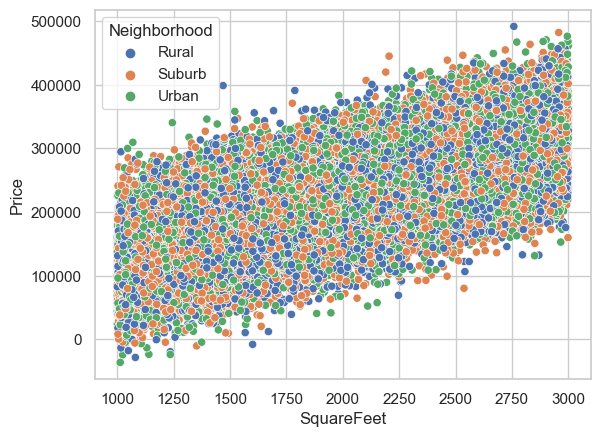

In [7]:
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'SquareFeet', y = 'Price', data = df, hue = 'Neighborhood')

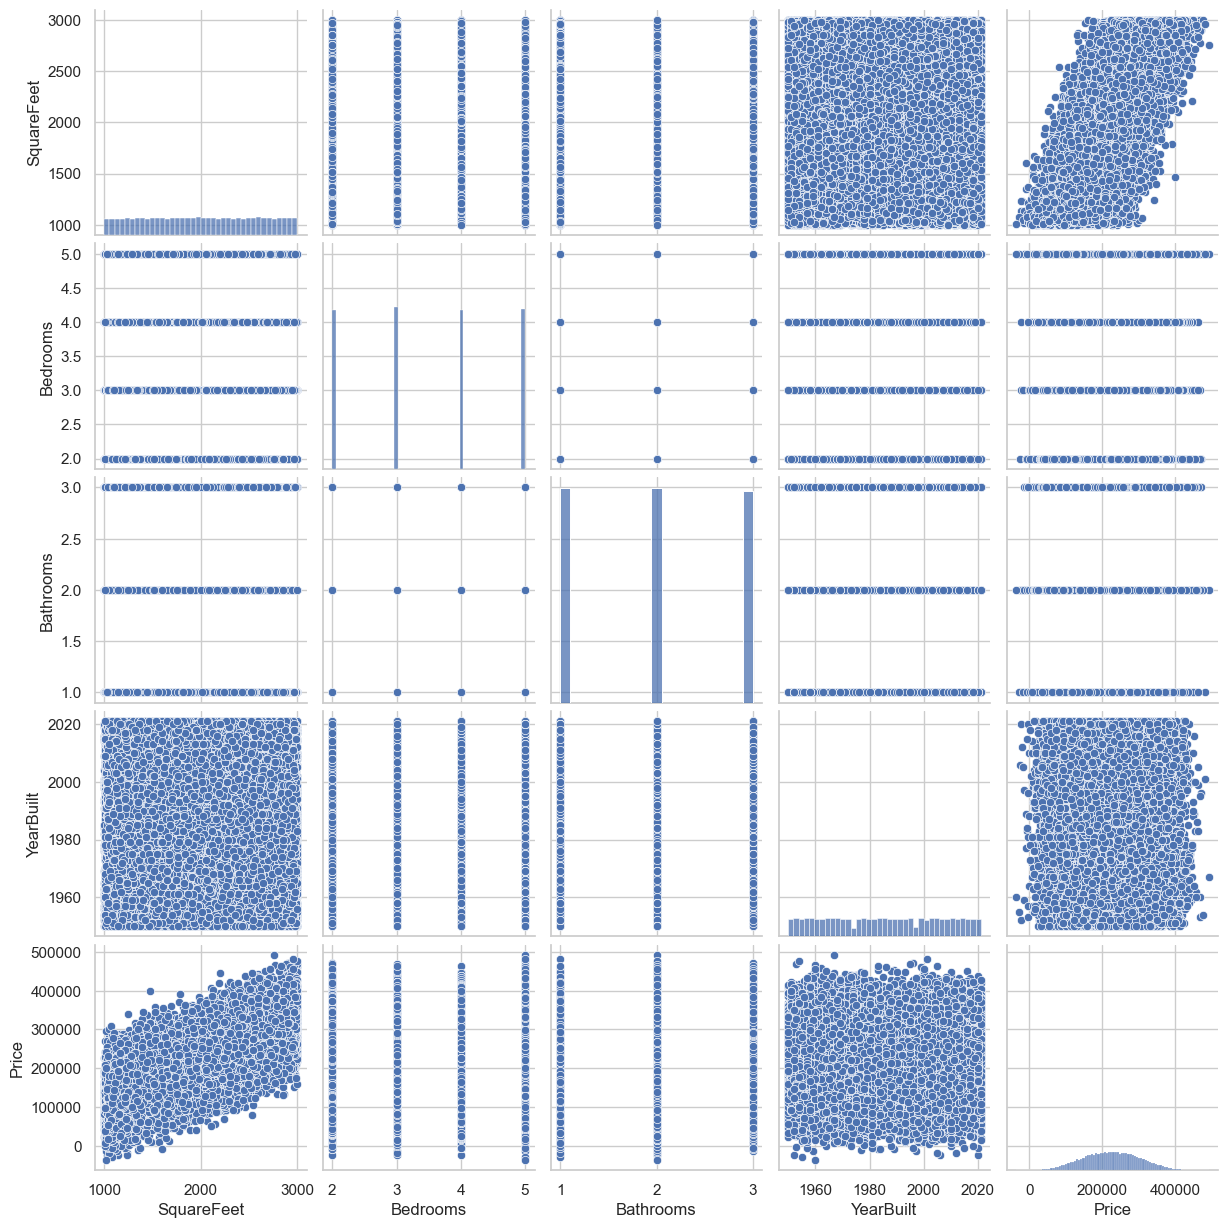

In [8]:
sns.pairplot(df)

<Axes: xlabel='YearBuilt'>

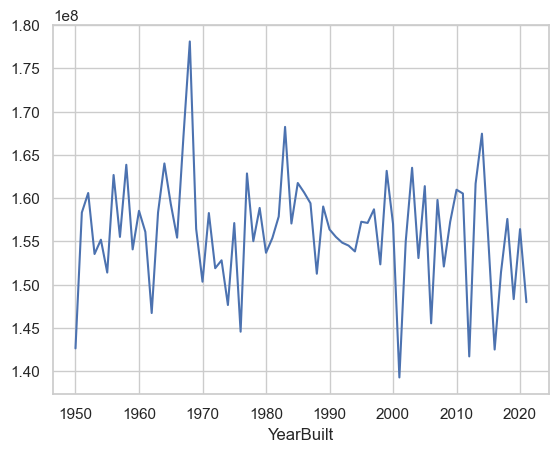

In [9]:
df.groupby('YearBuilt')['Price'].sum().plot(kind = 'line')

<Axes: xlabel='Bedrooms'>

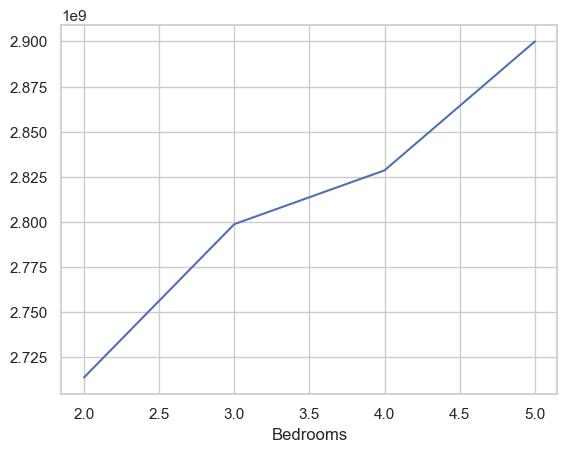

In [10]:
df.groupby('Bedrooms')['Price'].sum().plot(kind = 'line')

<Axes: xlabel='Bathrooms'>

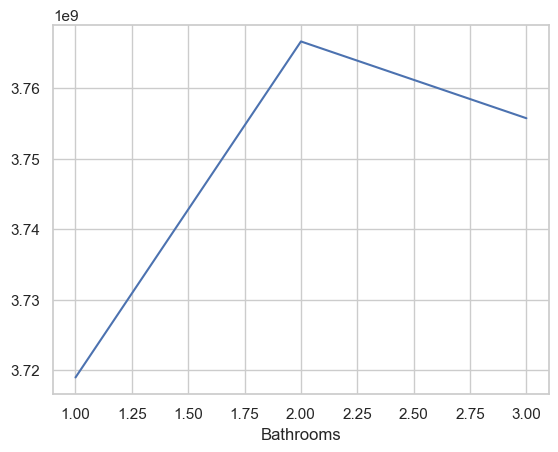

In [11]:
df.groupby('Bathrooms')['Price'].sum().plot(kind = 'line')

#### One-hot Encoding

In [12]:
# Since the Neighbourhoods are of type object, convert that to numeric type..
df = pd.get_dummies(df,columns=['Neighborhood'],drop_first=True, dtype=int)
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,0,0
1,2459,3,2,1980,195014.221626,0,0
2,1860,2,1,1970,306891.012076,1,0
3,2294,2,1,1996,206786.787153,0,1
4,2130,5,2,2001,272436.239065,1,0


In [13]:
Y = df['Price']
X = df.drop('Price',axis=1)

In [14]:
X.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt',
       'Neighborhood_Suburb', 'Neighborhood_Urban'],
      dtype='object')

#### Scaling

In [15]:
ss = StandardScaler()
X[['SquareFeet', 'Bedrooms', 'Bathrooms','YearBuilt']] = ss.fit_transform(X[['SquareFeet', 'Bedrooms', 'Bathrooms','YearBuilt']])
X.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Suburb,Neighborhood_Urban
0,0.207861,0.449067,-1.220113,-0.791751,0,0
1,0.786480,-0.446738,0.005614,-0.260842,0,0
2,-0.254340,-1.342543,-1.220113,-0.743486,1,0
3,0.499777,-1.342543,-1.220113,0.511390,0,1
4,0.214811,1.344872,0.005614,0.752713,1,0


### Model Training

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [17]:
X_train.shape,X_test.shape

((37500, 6), (12500, 6))

In [18]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [24]:
Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)
print(f'Training RMSE: {np.sqrt(mean_squared_error(Y_pred_train,Y_train))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(Y_pred_train,Y_train))}')

Training RMSE: 49871.25195609414
Test RMSE: 49871.25195609414


- Prediction Analysis

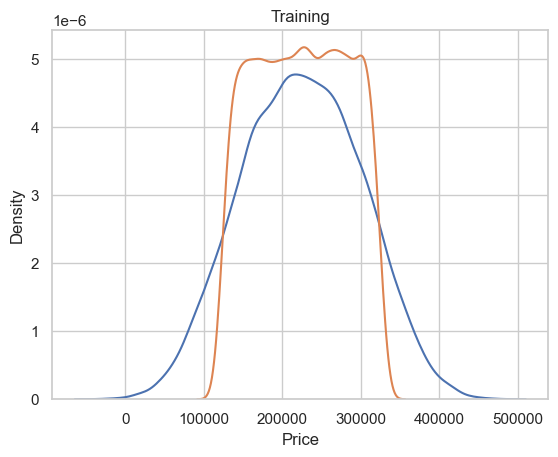

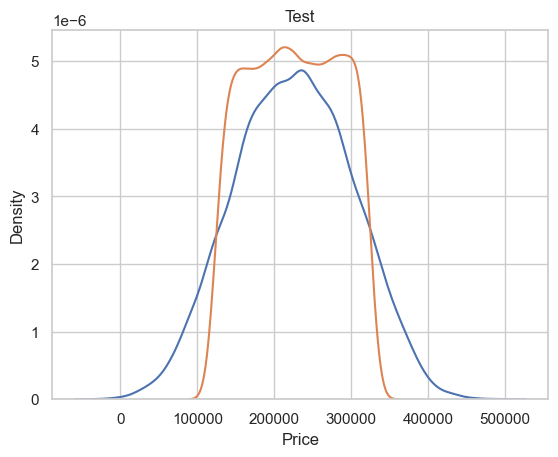

In [22]:
sns.kdeplot(Y_train)
sns.kdeplot(Y_pred_train)
plt.title('Training')
plt.show()
sns.kdeplot(Y_test)
sns.kdeplot(Y_pred_test)
plt.title('Test')
plt.show()